# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_ms = pd.merge(mouse_metadata, study_results,  how = "left", on=["Mouse ID","Mouse ID"])


# Display the data table for preview
combined_ms.drop_duplicates(subset="Mouse ID", keep=False, ignore_index=True).head(5)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b447,Ceftamin,Male,2,30,0,45.0,0
1,d133,Zoniferol,Male,5,30,0,45.0,0
2,f932,Ketapril,Male,15,29,0,45.0,0
3,h428,Ketapril,Female,1,27,0,45.0,0
4,l872,Placebo,Male,19,30,0,45.0,0


In [119]:
# Checking the number of mice.
combined_ms["Mouse ID"].nunique(0)

249

In [120]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_ms.duplicated(subset=['Mouse ID', 'Timepoint'], keep="first")
duplicated_mice_ID = combined_ms.loc[duplicated_mice == True, 'Mouse ID'].unique()
duplicated_mice_ID

array(['g989'], dtype=object)

In [121]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = combined_ms.loc[combined_ms['Mouse ID'] == duplicated_mice_ID[0],]
duplicated_mice_ID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [122]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = combined_ms.drop(duplicated_mice_ID_data.index)
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [123]:
# Checking the number of mice in the clean DataFrame.
clean_mice["Mouse ID"].nunique(0)

248

## Summary Statistics

In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_mice.groupby('Drug Regimen').mean(numeric_only = True)['Tumor Volume (mm3)']
tumor_median = clean_mice.groupby('Drug Regimen').median(numeric_only = True)['Tumor Volume (mm3)']
tumor_variance = clean_mice.groupby('Drug Regimen').var(numeric_only = True)['Tumor Volume (mm3)']
tumor_std = clean_mice.groupby('Drug Regimen').std(numeric_only = True)['Tumor Volume (mm3)']
tumor_sem = clean_mice.groupby('Drug Regimen').sem(numeric_only = True)['Tumor Volume (mm3)']


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_df = pd.DataFrame({
"Mean Tumor Volume": tumor_mean,
"Median Tumor Volume": tumor_median,
"Tumor Volume Variance": tumor_variance,
"Tumor Volume Std. Dev.": tumor_std,
"Tumor Volume Std. Err.": tumor_sem
})

drug_regimen_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [125]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_agg = clean_mice.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_regimen_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

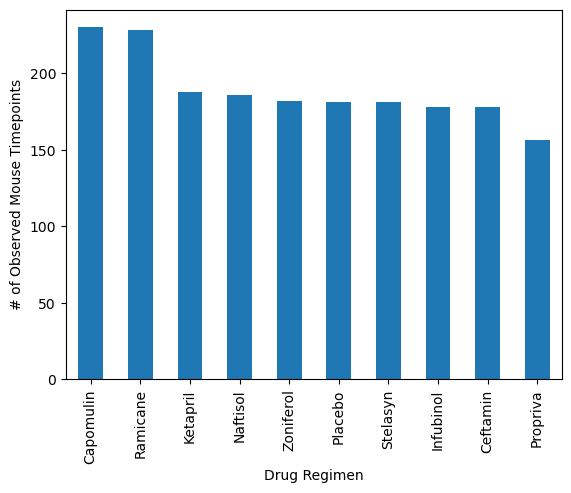

In [126]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

clean_mice2 = combined_ms.drop_duplicates(subset=["Mouse ID", "Timepoint"])

regimen_counts = clean_mice2["Drug Regimen"].value_counts()

regimen_counts_pandas = regimen_counts.plot.bar(xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")

plt.show()

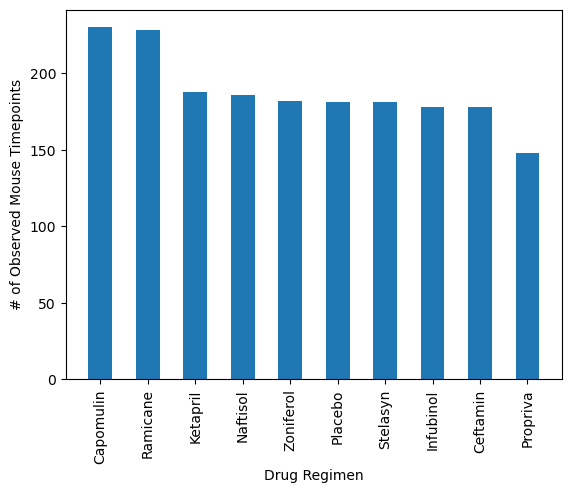

In [127]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = clean_mice['Drug Regimen'].value_counts()
x_axis = list(range(len(drug_counts)))
plt.bar(x_axis, drug_counts, width = 0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_counts.index.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


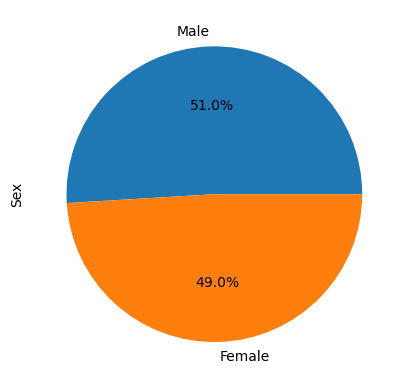

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_gender = clean_mice['Sex'].value_counts()
mouse_pie = pd.Series(mouse_gender.values, index=mouse_gender.index)
mouse_pie.plot(kind='pie', autopct='%1.1f%%', startangle=0, ylabel="Sex")
plt.show()


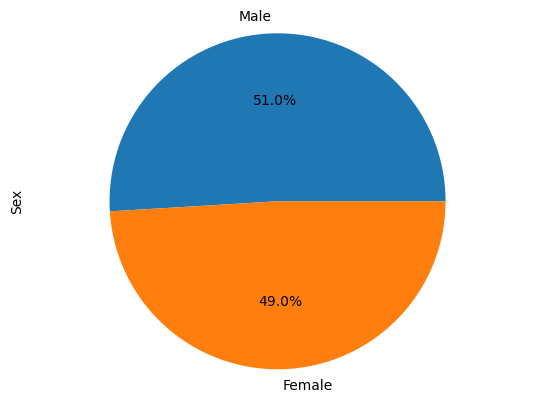

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_gender, autopct="%1.1f%%", startangle=0, labels=mouse_gender.index)
plt.axis("equal")
plt.ylabel("Sex")
plt.savefig("images/Glantz_PyPies_pyplot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [158]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint= clean_mice.groupby('Mouse ID').max()['Timepoint']
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(max_timepoint_df, clean_df, on=("Mouse ID","Timepoint"))
final_tumor_vol_df


    Mouse ID  Maximum Timepoint
0       b447                  0
1       x226                  0
2       f932                  0
3       x336                  0
4       l872                  0
..       ...                ...
243     k894                 45
244     l471                 45
245     l509                 45
246     i177                 45
247     z969                 45

[248 rows x 2 columns]


,Mouse ID,Maximum Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b447,0,Ceftamin,Male,2,30,0,45.000000,0
1,x226,0,Ceftamin,Male,23,28,0,45.000000,0
2,f932,0,Ketapril,Male,15,29,0,45.000000,0
3,x336,0,Naftisol,Female,4,29,0,45.000000,0
4,l872,0,Placebo,Male,19,30,0,45.000000,0
...,...,...,...,...,...,...,...,...,...
1875,z969,45,Naftisol,Male,9,30,25,63.145652,2
1876,z969,45,Naftisol,Male,9,30,30,65.841013,3
1877,z969,45,Naftisol,Male,9,30,35,69.176246,4
1878,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [161]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    drug_regimen_loop = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'] == drug]
    
    quartiles = drug_regimen_loop['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = drug_regimen_loop['Tumor Volume (mm3)']
    potential_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
       
    # add subset 
    tumor_volume_data.append({
        'Drug': drug,
        'Lower Quartile': lowerq,
        'Upper Quartile': upperq,
        'IQR': iqr,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Potential Outliers': potential_outliers
    })
    
     
    # Determine outliers using upper and lower bounds
    print(drug + "'s potential outliers:", potential_outliers)


Capomulin's potential outliers: 828    25.472143
829    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1809    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [162]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


NameError: name 'drug_values' is not defined

## Line and Scatter Plots

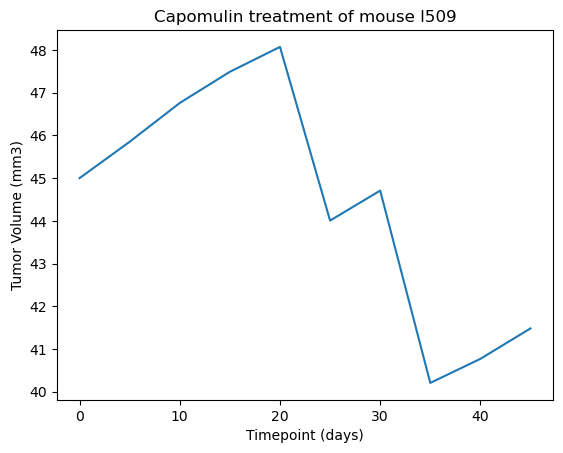

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


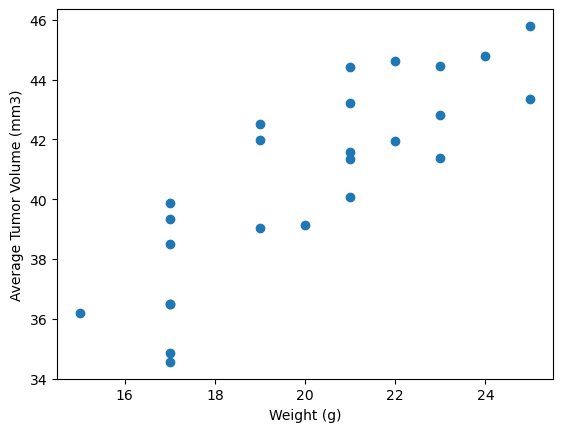

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


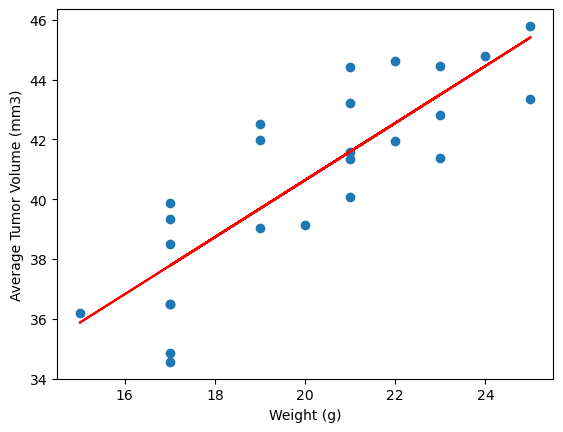

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
